## Test a random forest model on full dataset

In [1]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.

import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

import numpy as np
import math
# The usual preamble
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['axes.color_cycle'] = ['r', 'g', 'b', 'c']
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (15, 5)

import process
from modeling import categorize

Populating the interactive namespace from numpy and matplotlib


/Users/along528/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load in dataset

In [2]:
test_data,val_data = process.get_split_add_data()
val_data

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,chiefmin_per_capita,chiefmax_per_capita,sgtmin_per_capita,sgtmax_per_capita,entrymin_per_capita,entrymax_per_capita,nummrkcars_per_capita,numothmrk_per_capita,numumkcars_per_capita,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,rpsi,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1222,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,0,5,37,0,0,0,0,0,6,24649,323,9712,9063,35,65,65,...,4.943333,4.943333,2.824183,2.965287,1.670695,2.456337,0.000675,0.000150,0.000450,0.000150,0,0.000000,0.000075,0.000038,0.000075,0.000525,0.000000,3.067020,0.013104,0.003862,0.256944,1.000000,1,1.000000,1.000000,1.000000,1.200000,0.000000,1.031163,0.000000
184,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,0,23,209,82,0,0,0,0,13,64836,22146,40950,26944,7822,300,300,...,0.987569,1.032871,0.576197,0.587504,0.406117,0.414127,0.001196,0.000190,0.000734,0.000136,0,0.000000,0.000000,0.000082,0.000000,0.000027,0.000027,1.356672,0.341569,0.290306,0.242741,0.987952,1,1.000000,1.000000,1.000000,0.565217,0.348868,1.361861,0.256170
175,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,309,46,683,512,0,0,0,436,46,36606,48114,46061,17050,17580,592,417,...,0.960305,1.129770,0.541951,0.579822,0.331822,0.499568,0.001477,0.000234,0.000912,0.000169,0,0.000000,0.000024,0.000105,0.000347,0.000016,0.000000,1.708121,1.314375,1.031085,0.665044,1.354497,1,1.000000,1.000000,1.411003,1.000000,0.389109,2.118801,0.183646
170,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,0,17,434,406,0,406,0,0,7,55191,5803,29034,21017,1763,152,148,...,1.319354,1.344082,0.831322,0.856433,0.596734,0.765881,0.000519,0.000111,0.000334,0.000074,0,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,1.210668,0.105144,0.083884,0.373494,0.637363,1,0.637363,1.000000,1.000000,0.411765,0.376702,1.307061,0.288205
174,59531,1435,427,0,0,0,0,0,82,363,0,0,0,0,0,43,53,0,0,0,0,0,28,41750,12292,23342,16691,4492,107,101,...,1.512157,1.512157,1.170128,1.170128,0.796690,1.060739,0.000377,0.000098,0.000328,0.000066,0,0.000000,0.000000,0.000066,0.000197,0.000000,0.000016,2.385800,0.294419,0.269127,0.146006,1.000000,1,1.000000,1.000000,1.000000,0.651163,0.147321,1.359057,0.108400
179,73240,0,790,0,0,0,0,0,59,673,0,0,0,0,0,34,59,0,0,0,0,0,14,46607,9530,27832,19961,2811,160,172,...,1.256144,1.392682,0.881649,1.089364,0.666562,0.887862,0.000410,0.000137,0.000164,0.000096,0,0.000000,0.000000,0.000055,0.000000,0.000000,0.0000

In [ ]:
val_data.to_sql('val_data',process.engine,if_exists='replace')



In [ ]:
val_data

# Build Model

In [3]:
processor = process.Processor(val_data,categorize=False)
X_val,y_val = processor.get_scaled_Xy(val_data)
X_test,y_test = processor.get_scaled_Xy(test_data)

In [4]:
len(val_data)

147

In [5]:
val_data_scaled = pd.DataFrame(np.c_[X_val,y_val],index=val_data.index,columns=val_data.drop('rpsi',1).columns.tolist()+['rpsi'])
val_data_scaled.to_sql('val_data_scaled',process.engine,if_exists='replace')#print X_val+y_val

In [ ]:
plt.hist(val_data['rpsi'].tolist(),bins=40)

In [ ]:
val_data_scaled['rpsi']

In [ ]:
for cat in sort(val_data_scaled['rpsi'].map(categorize).unique().tolist()):
    
    print cat, shape(val_data_scaled[val_data_scaled['rpsi'].map(categorize)==cat])[0]

In [6]:
np.shape(X_val)[1]

188

In [10]:
from sklearn import linear_model,cross_validation,metrics,grid_search
from sklearn.ensemble import RandomForestRegressor
values = range(10,n_features+10,10)
n_iter = len(values)
n_features = np.shape(X_val)[1]
param_grid = {'n_estimators': values}
clf = RandomForestRegressor(n_jobs=4,max_features=n_features)
clfmodel = grid_search.RandomizedSearchCV(clf,param_grid,
                                          n_iter,
                                          cv=cross_validation.LeaveOneOut(len(y_val)),
                                          verbose=1,random_state=2)
clfmodel.fit(X_val,y_val)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   59.3s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  5.4min
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed: 10.3min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed: 17.8min
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed: 30.1min
[Parallel(n_jobs=1)]: Done 2793 out of 2793 | elapsed: 37.5min finished


Fitting 147 folds for each of 19 candidates, totalling 2793 fits


RandomizedSearchCV(cv=sklearn.cross_validation.LeaveOneOut(n=147),
          error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=188, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=19, n_jobs=1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]},
          pre_dispatch='2*n_jobs', random_state=2, refit=True,
          scoring=None, verbose=1)

In [14]:
print clfmodel.best_params_
print clfmodel.best_score_
est = clfmodel.best_estimator_

features = []
importances = []
for feature,importance in zip(val_data.drop('rpsi',1).columns.tolist(),clfmodel.best_estimator_.feature_importances_):
    #print feature,importance
    features.append(feature)
    importances.append(importance)
indices = [i[0] for i in sorted(enumerate(importances), key=lambda x:x[1])]
best_feature_names = []
for index in reversed(indices):
    print features[index],importances[index]
    if importances[index] < 0.005:
        continue
    best_feature_names.append(features[index])
print len(best_feature_names)

{'n_estimators': 10}
0.0
asian_per_capita 0.397042284606
totacad 0.0873274363678
opbudget_per_capita 0.0533727819174
white_officer_disparity 0.0352019853157
hispanic_per_capita 0.0317734285102
institutionalized_juvenile_white 0.02926074288
entrymin 0.0280166020772
numfixcam_per_capita 0.0267918350016
sgtmin 0.0237963891836
unkrace 0.0197938807396
numinvst_per_capita 0.0183592230899
totfield_per_capita 0.0137584647005
total_income_estimate_white_per_capita 0.0127777654712
black_over_white_institutionalized_adult_disparity 0.0118959454828
rural_per_capita 0.0111515806949
sgtmax 0.0094384742164
chiefmax_per_capita 0.00940571261156
institutionalized_white_per_capita 0.00798163098182
totftemp 0.00793663271945
numcarcam 0.00721263448974
numcarcam_per_capita 0.0070690546009
unkrace_per_capita 0.00682771899018
chiefmin 0.00671129166808
numumkcars_per_capita 0.00651383418275
numrespoff_per_capita 0.00624455684591
black_over_white_institutionalized_juvenile_disparity 0.00534452481133
institution

In [39]:
import pickle
pickle.dump(best_feature_names,open('best_features_names_reg.p','wb'))


In [ ]:
import pickle
best_feature_names = pickle.load(open('best_features_names_reg.p','rb'))
print best_feature_names

In [40]:
import pickle
pickle.dump(est,open('randomforestclassifier_fixed_reg.p','wb'))

In [41]:
est = pickle.load(open('randomforestclassifier_fixed_reg.p','rb'))
print est

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=188, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [118]:
est.score(X_val,y_val)

0.78987808977131524

In [121]:
est.score(X_test,y_test)

-0.32955308139994433

In [119]:
def categorize(rpsi):
    if rpsi >=0 and rpsi <=1.6:
        return 0
    elif rpsi < 2.2:
        return 1
    else: return 2


In [122]:
#classification
nmatch = 0
total = 0
y_predict=[]
for y in est.predict(X_test).tolist():
    y_predict.append(categorize(y))
y_actual=[]
for y in y_test.tolist():
    y_actual.append(categorize(y))

from collections import defaultdict
cattotal = defaultdict(int)
for prediction, actual in zip(y_predict,y_actual):
    ismatch = prediction==actual
    cattotal[actual]+=1
    if ismatch:
        nmatch+=1
    total+=1

print "test accuracy =",float(nmatch)/float(total)
print "total",total
for cat in cattotal:
    print cat,float(cattotal[cat])/float(total)

test accuracy = 0.555555555556
total 36
0 0.361111111111
1 0.333333333333
2 0.305555555556


In [107]:

x = est.predict(X_val)
y = y_val


(0, 12)

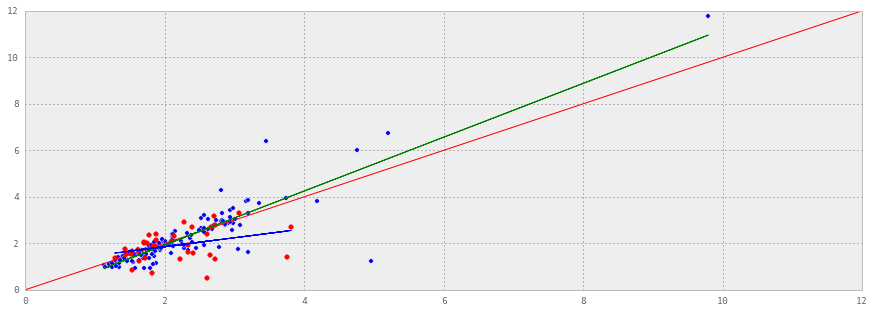

In [103]:
plt.scatter(est.predict(X_val),y_val)
plt.scatter(est.predict(X_test),y_test,color='r')



plt.plot(np.linspace(0, 12, 1000),np.linspace(0, 12, 1000))

x = est.predict(X_val)
y = y_val
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

x = est.predict(X_test)
y = y_test
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

plt.ylim([0,12])
plt.xlim([0,12])

array([[4, 3, 6],
       [2, 8, 2],
       [0, 3, 8]])

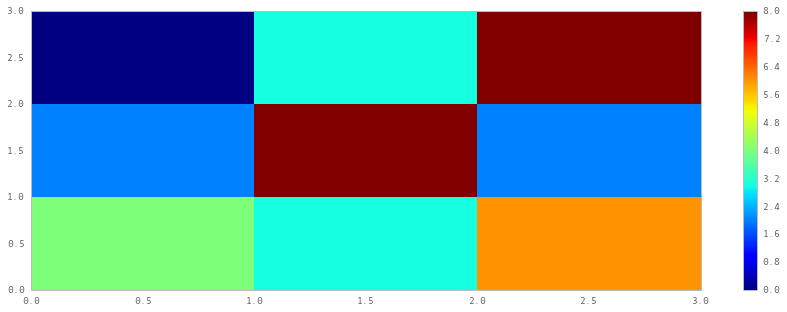

In [123]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_actual,y_predict) #clfmodel2.predict(X_test))
plt.pcolor(matrix.T.T)
plt.colorbar()
matrix

In [ ]:
sql_query = """
    SELECT  * FROM traffic_joined_with_features;
    """
data = add_features(get_data())

descriptors = []
descriptors = ['agency','city','state','zipcode']
test = pd.read_sql_query(sql_query,con).drop('index',axis=1)
test = test[test['surveyid'].isin(data.index.tolist())]
#test = test.merge(data,how='right',right_on='surveyid')
#data = add_features(get_data())[best_feature_names+['agency']]
#test
test = test.sort(columns='surveyid').set_index('surveyid',drop=True)
test = test[descriptors]
test
sorted_data = data.sort_index()
sorted_data = sorted_data[best_feature_names]
output = pd.concat([test,sorted_data],axis=1)
output

In [ ]:
import pickle
#clf = pickle.load(open('randomforestclassifier.p','rb'))
best_feature_names = pickle.load(open('best_features_names.p','rb'))

In [ ]:
plt.pcolor(np.abs(np.corrcoef((X_val.T))))
plt.colorbar()

In [71]:
plot_data

,urban,rural,institutionalized_all,institutionalized_adult_all,institutionalized_adult_federal_detention_all,institutionalized_adult_federal_prison_all,institutionalized_adult_state_prison_all,institutionalized_adult_local_jail_all,institutionalized_juvenile_all,institutionalized_white,institutionalized_adult_white,institutionalized_adult_federal_detention_white,institutionalized_adult_federal_prison_white,institutionalized_adult_state_prison_white,institutionalized_adult_local_jail_white,institutionalized_juvenile_white,institutionalized_black,institutionalized_adult_black,institutionalized_adult_federal_detention_black,institutionalized_adult_federal_prison_black,institutionalized_adult_state_prison_black,institutionalized_adult_local_jail_black,institutionalized_juvenile_black,population_white,population_black,total_income_estimate_all,total_income_estimate_white,total_income_estimate_black,swnauthemp,swnftemp,...,chiefmin_per_capita,chiefmax_per_capita,sgtmin_per_capita,sgtmax_per_capita,entrymin_per_capita,entrymax_per_capita,nummrkcars_per_capita,numothmrk_per_capita,numumkcars_per_capita,numothunm_per_capita,numplanes_per_capita,numcopters_per_capita,numboats_per_capita,nummotor_per_capita,numcarcam_per_capita,numfixcam_per_capita,nummobcam_per_capita,rpsi,black_over_white_population_disparity,black_over_white_income_disparity,black_over_white_institutionalized_disparity,black_over_white_institutionalized_adult_disparity,black_over_white_institutionalized_adult_federal_detention_disparity,black_over_white_institutionalized_adult_federal_prison_disparity,black_over_white_institutionalized_adult_state_prison_disparity,black_over_white_institutionalized_adult_local_jail_disparity,black_over_white_institutionalized_juvenile_disparity,black_officer_disparity,white_officer_disparity,black_over_white_officer_disparity
surveyid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1212,27617,0,225,0,0,0,0,0,0,189,0,0,0,0,0,0,24,0,0,0,0,0,0,16681,4814,10241,6409,1917,86,78,...,3.133287,3.133287,2.166419,2.166419,1.612956,1.939023,0.001086,0.000181,0.000652,0.000145,0,0,0.000036,0.000109,0.000435,0.000579,0.000000,1.322864,0.288592,0.299111,0.126984,1.000000,1,1.000000,1.000000,1.000000,1.000000,0.588391,1.315987,0.447110
1222,26616,31,186,0,0,0,0,0,13,144,0,0,0,0,0,5,37,0,0,0,0,0,6,24649,323,9712,9063,35,65,65,...,4.943333,4.943333,2.824183,2.965287,1.670695,2.456337,0.000675,0.000150,0.000450,0.000150,0,0,0.000075,0.000038,0.000075,0.000525,0.000000,3.067020,0.013104,0.003862,0.256944,1.000000,1,1.000000,1.000000,1.000000,1.200000,0.000000,1.031163,0.000000
184,110372,0,1149,219,0,0,0,0,44,861,83,0,0,0,0,23,209,82,0,0,0,0,13,64836,22146,40950,26944,7822,300,300,...,0.987569,1.032871,0.576197,0.587504,0.406117,0.414127,0.001196,0.000190,0.000734,0.000136,0,0,0.000000,0.000082,0.000000,0.000027,0.000027,1.356672,0.341569,0.290306,0.242741,0.987952,1,1.000000,1.000000,1.000000,0.565217,0.348868,1.361861,0.256170
175,123919,0,2194,1277,0,0,0,1095,119,1027,378,0,0,0,309,46,683,512,0,0,0,436,46,36606,48114,46061,17050,17580,592,417,...,0.960305,1.129770,0.541951,0.579822,0.331822,0.499568,0.001477,0.000234,0.000912,0.000169,0,0,0.000024,0.000105,0.000347,0.000016,0.000000,1.708121,1.314375,1.031085,0.665044,1.354497,1,1.000000,1.000000,1.411003,1.000000,0.389109,2.118801,0.183646
1223,26668,0,186,0,0,0,0,0,4,171,0,0,0,0,0,4,14,0,0,0,0,0,0,23876,840,10853,9687,421,47,47,...,3.004401,3.967516,2.581683,3.705319,2.194957,2.443738,0.000487,0.000075,0.000262,0.000075,0,0,0.000037,0.000075,0.000000,0.000037,0.000000,1.314888,0.035182,0.043460,0.081871,1.000000,1,1.000000,1.000000,1.000000,0.000000,1.350963,0.950585,1.421190
170,78229,2653,1904,1341,0,1339,0,0,25,1162,637,0,637,0,0,17,434,406,0,406,0,0,7,55191,5803,29034,21017,1763,152,148,...,1.319354,1.344082,0.831322,0.856433,0.596734,0.765881,0.000519,0.000111,0.000334,0.000074,0,0,0.000012,0.000000,0.000000,0.000000,0.000000,1.210668,0.105144,0.083884,0.373494,0.637363,1,0.637363

In [89]:
plot_data = process.add_features(process.get_data())
processor = process.Processor(val_data,categorize=False)
X,y = processor.get_scaled_Xy(plot_data)
Xy = np.c_[y,X]

feature_names = ['rpsi']+plot_data.drop(['rpsi'],1).columns.tolist()
correlations = np.corrcoef(Xy)[0].tolist()
indices = np.argsort(correlations).tolist()
indices.reverse()
for index in indices:
    print feature_names[index],correlations[index]

rpsi 1.0
institutionalized_juvenile_white 0.548981817262
black 0.502745814053
institutionalized_adult_all_per_capita 0.498139710125
drugforf 0.473057957175
institutionalized_juvenile_all 0.399568673188
chiefmin 0.390309928958
totftemp 0.383011128212
institutionalized_adult_federal_prison_white 0.368666822695
rural 0.356717145082
institutionalized_adult_federal_detention_black 0.353396261694
total_income_estimate_black 0.350949595633
institutionalized_juvenile_black 0.288491446632
totinsrv 0.284816387372
institutionalized_adult_local_jail_black 0.258623822631
institutionalized_adult_state_prison_all 0.257429237501
institutionalized_all 0.245529614232
black_over_white_income_disparity 0.244761834587
numfixcam 0.243932449176
institutionalized_black 0.241770014074
chiefmax 0.239342353439
numcopters 0.23743761161
institutionalized_adult_all 0.215994148518
institutionalized_adult_state_prison_black 0.214987666067
total_income_estimate_white 0.204510411724
population_black 0.203072120675
numm